# Implied Volatility using Newton's Method

## Introduction

Implied volatility (IV) is a key metric in options pricing, representing the market's expectation of future volatility. 
Newton's method, a numerical root-finding algorithm, can be used to calculate the implied volatility of European options.

### Objectives:
1. Implement Newton's Method to compute implied volatility.
2. Use the Black-Scholes model for theoretical option pricing.
3. Visualize the progression of Newton's method using Python.

### Libraries Used:
- `py_vollib`: For Black-Scholes pricing and Greeks computation.
- `matplotlib`: For plotting and visualization.
- `numpy`: For numerical operations.

## Importing Libraries

We use the following libraries:
1. **`py_vollib.black_scholes`**: To compute option prices using the Black-Scholes model.
2. **`py_vollib.black_scholes.greeks.analytical`**: To calculate the vega (rate of change of option price w.r.t. volatility).
3. **`matplotlib`**: For plotting and creating animations.
4. **`numpy`**: For numerical operations.
5. **`IPython.display`**: To render animations directly in the notebook.

In [1]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
from matplotlib import rc

# Configure matplotlib for animations
rc('animation', html='jshtml')
plt.style.use('ggplot')

## Implementing Newton-Raphson Method

The Newton-Raphson method is an iterative numerical technique used to find roots of a real-valued function. In this context, 
it is used to find the implied volatility of a European option by solving the equation:

$$
f(\sigma) = C_{\text{BS}}(\sigma) - C_{\text{market}} = 0
$$

Where:
- $C_{\text{BS}}(\sigma)$: Black-Scholes price with volatility $\sigma$.
- $C_{\text{market}}$: Observed market price.

The iteration follows the formula:
$$
\sigma_{\text{new}} = \sigma_{\text{old}} - \frac{f(\sigma)}{f'(\sigma)}
$$

Here, $f'(\sigma)$ is the vega of the option.

In [2]:
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """
    Compute the implied volatility of a European Option.

    Parameters:
    S0 : float : Initial stock price
    K : float : Strike price
    T : float : Time to maturity (in years)
    r : float : Risk-free interest rate
    market_price : float : Observed market price of the option
    flag : str : Option type ('c' for call, 'p' for put)
    tol : float : Tolerance for convergence

    Returns:
    float : Implied volatility
    """
    max_iter = 200  # Maximum number of iterations
    vol_old = 0.30  # Initial guess for implied volatility

    for k in range(max_iter):
        # Black-Scholes price and vega
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime = vega(flag, S0, K, T, r, vol_old) * 100

        # Function value and update
        C = bs_price - market_price
        vol_new = vol_old - C / Cprime

        # Convergence check
        if abs(vol_old - vol_new) < tol:
            break

        vol_old = vol_new

    return vol_old

## Calculating an Example Option's Implied Volatility

We calculate the implied volatility of a European call option with the following parameters:
- Initial stock price ($ S_0 $): $30
- Strike price ($ K $): $28
- Time to maturity ($ T $): 0.2 years
- Risk-free rate ($ r $): 2.5%
- Market price: $3.97

In [3]:
# Example parameters
S0, K, T, r = 30, 28, 0.2, 0.025
market_price = 3.97

# Calculate implied volatility
implied_vol_est = implied_vol(S0, K, T, r, market_price, flag='c')
print("Implied Volatility is:", round(implied_vol_est * 100, 2), "%")

Implied Volatility is: 53.81 %


## Visualizing Newton's Method for Implied Volatility

To better understand how Newton's Method converges to the implied volatility, we plot the intermediate steps of the calculation. 
The plot shows:
1. The relationship between implied volatility and option price (Black-Scholes curve).
2. Iterative adjustments made by Newton's Method to reach the implied volatility.

### Steps:
1. Track intermediate implied volatility and option price values during the iterations.
2. Plot these steps on a graph for visualization.
3. Highlight the market price and the calculated implied volatility.

In [4]:
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.000001):
    """
    Compute the implied volatility of a European Option with intermediate value tracking.

    Parameters:
    S0 : float : Initial stock price
    K : float : Strike price
    T : float : Time to maturity (in years)
    r : float : Risk-free interest rate
    market_price : float : Observed market price of the option
    flag : str : Option type ('c' for call, 'p' for put)
    tol : float : Tolerance for convergence

    Returns:
    float : Implied volatility
    list : x_vals : Intermediate implied volatility values for plotting
    list : y_vals : Corresponding option price values for plotting
    """
    max_iter = 200  # Maximum number of iterations
    vol_old = 0.11  # Initial guess for implied volatility
    x_vals, y_vals = [], []  # Lists to store values for visualization

    for k in range(max_iter):
        # Black-Scholes price and vega
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime = vega(flag, S0, K, T, r, vol_old) * 100

        # Function value and update
        C = bs_price - market_price
        vol_new = vol_old - C / Cprime

        # Track iteration values
        x_vals.append([vol_old * 100, vol_old * 100])  # Vertical movement
        y_vals.append([0, bs_price])  # Horizontal movement

        # Track the next step
        x_vals.append([vol_old * 100, vol_new * 100])  # Step to new point
        y_vals.append([bs_price, 0])

        # Convergence check
        if abs(vol_old - vol_new) < tol:
            break

        vol_old = vol_new

    return vol_old, x_vals, y_vals

## Generate Black-Scholes Prices for Visualization

We compute the Black-Scholes prices for a range of implied volatilities to create a reference curve.
This curve represents the theoretical relationship between implied volatility and option price.

In [5]:
# Parameters
S0, K, T, r, sigma = 30, 28, 0.2, 0.025, 0.3

# Generate Black-Scholes prices
prices, vols = [], []
for sigma in range(1, 125):  # Volatility from 1% to 125%
    prices.append(bs('c', S0, K, T, r, sigma / 100))
    vols.append(sigma)

# Market price
market_price = 3.9790765403377035

# Calculate implied volatility and intermediate values
implied_vol, x_vals, y_vals = implied_vol(S0, K, T, r, market_price, flag='c')

## Plotting Newton's Method Progression

We visualize the convergence process of Newton's Method:
1. The Black-Scholes price curve represents the theoretical option prices for different implied volatilities.
2. Intermediate points and steps taken by Newton's Method are plotted to show the adjustment process.

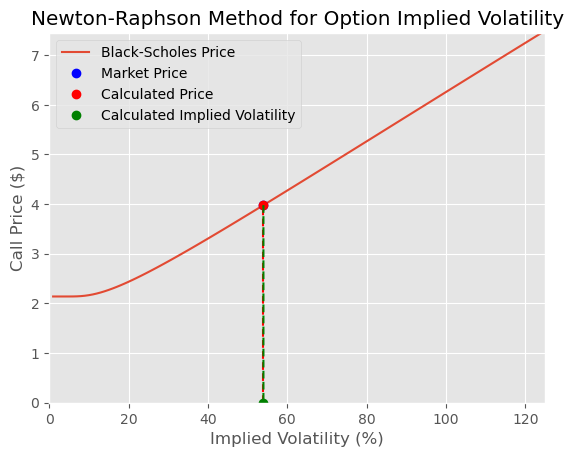

In [6]:
# Plot setup
fig, ax = plt.subplots()
plt.title('Newton-Raphson Method for Option Implied Volatility')
plt.ylabel('Call Price ($)')
plt.xlabel('Implied Volatility (%)')

# Plot Black-Scholes curve and market price
y1, = ax.plot(vols, prices, label='Black-Scholes Price')
y3, = ax.plot([54], [market_price], 'bo', label='Market Price')  # Market price
y2, = ax.plot([], [], 'r--')  # Red dashed line for steps
y4, = ax.plot([], [], 'ro', label='Calculated Price')  # Red points
y5, = ax.plot([], [], 'go', label='Calculated Implied Volatility')  # Green points
y6, = ax.plot([], [], 'g--')  # Green dashed line for convergence

# Animation functions
def init():
    ax.set_xlim(0, 125)
    ax.set_ylim(0, max(prices))
    return y2, y4

def update(frame):
    # Update intermediate points
    xdata, ydata = x_vals[frame], y_vals[frame]
    if frame % 2 == 0:  # Step to new point
        y2.set_data([xdata], [ydata])
        y4.set_data([xdata[1]], [ydata[1]])
        return y2, y4
    else:  # Convergence
        y6.set_data([xdata], [ydata])
        y5.set_data([xdata[1]], [ydata[1]])
        return y2, y4

# Create animation
anim = animation.FuncAnimation(fig, update, frames=len(x_vals),
                                init_func=init, interval=750, repeat=True, blit=False)

ax.legend(loc='upper left')

# Render animation
HTML(anim.to_html5_video())